In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
from collections import Counter
import numpy as np

In [2]:
df = pd.DataFrame({'1-lgbtq': [0, 3, 3, 0, 3, 3, 1, 3, 3, 3],
              "2-guns": [3, 3, 3, 3, 1, 3, 3, 3, 3, 3],
              "3-abortion": [3, 3, 3, 2, 3, 3, 3, 3, 3, 3],
             "4-affirmative_action":[3, 3, 3, 2, 1, 1, 3, 1, 3, 3],
             "5-climate_change": [3, 3, 3, 2, 3, 3, 3, 3, 3, 3],
             "6-citizenship": [0, 3, 3, 3, 3, 3, 3, 0, 3, 3],
             "7-death_penalty": [3, 3, 0, 3, 3, 1, 3, 1, 2, 1],
             "8-women_in_military": [0, 3, 3, 3, 3, 3, 3, 3, 3, 3],
             "9-marijuana": [3, 3, 3, 2, 3, 2, 3, 3, 3, 0],
             "10-student_loans": [3, 0, 3, 3, 3, 3, 3, 3, 3, 0]})

In [3]:
df.index = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"]

### adding whether each of the agents support biden, trump, or are neutral

In [4]:
#TRUMP = -1, NEUTRAL = 0, BIDEN = 1
df_with_support = df.copy()
df_with_support["biden_or_trump"] = [-1,1,1,0,-1,1,-1,1,1,1]

In [5]:
df_with_support

,1-lgbtq,2-guns,3-abortion,4-affirmative_action,5-climate_change,6-citizenship,7-death_penalty,8-women_in_military,9-marijuana,10-student_loans,biden_or_trump
A,0,3,3,3,3,0,3,0,3,3,-1
B,3,3,3,3,3,3,3,3,3,0,1
C,3,3,3,3,3,3,0,3,3,3,1
D,0,3,2,2,2,3,3,3,2,3,0
E,3,1,3,1,3,3,3,3,3,3,-1
F,3,3,3,1,3,3,1,3,2,3,1
G,1,3,3,3,3,3,3,3,3,3,-1
H,3,3,3,1,3,0,1,3,3,3,1
I,3,3,3,3,3,3,2,3,3,3,1
J,3,3,3,3,3,3,1,3,0,0,1


# overall agreement vs disagreement

In [6]:
def count_vals(df_inpt):
    overall_li = []
    for i in df_inpt.columns:
        for j in list(df_inpt[i]):
            overall_li.append(j)
            
    
    number_counts = Counter(overall_li)

    x_values = list(number_counts.keys())
    y_values = list(number_counts.values())

    return (x_values,y_values)

In [7]:
biden = df_with_support[df_with_support["biden_or_trump"]==1]
biden = biden.drop(columns=["biden_or_trump"])
trump = df_with_support[df_with_support["biden_or_trump"]==-1]
trump = trump.drop(columns=["biden_or_trump"])
neutral = df_with_support[df_with_support["biden_or_trump"]==0]
neutral = neutral.drop(columns=["biden_or_trump"])

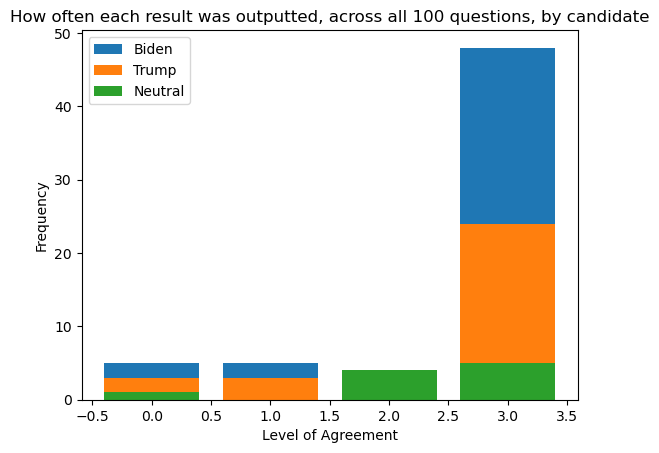

In [8]:
plt.bar(count_vals(biden)[0], count_vals(biden)[1])
plt.bar(count_vals(trump)[0], count_vals(trump)[1])
plt.bar(count_vals(neutral)[0], count_vals(neutral)[1])
plt.xlabel("Level of Agreement")
plt.ylabel("Frequency")
plt.title("How often each result was outputted, across all 100 questions, by candidate")
plt.legend(["Biden", "Trump", "Neutral"])

### - agents are WAY more likely to agree than disagree (code is probably skewed towards agreement)
### - only the neutral agent ever claimed to be neutral on a topic 
### - the neutral agent never disagreed on anything 


In [9]:
three_count = 0
one_count = 1
for i in df:
    for j in df[i]:
        if j == 3:
            three_count+=1
        if j ==1:
            one_count+=1
three_count/one_count

8.555555555555555

- agents were 8.5x likely to agree with a statement than disagree

# Jaccard similarity between agents

In [10]:
def jaccard_binary(x,y):
    """A function for finding the similarity between two binary vectors"""
    intersection = np.logical_and(x, y)
    union = np.logical_or(x, y)
    similarity = intersection.sum() / float(union.sum())
    return similarity

In [11]:
#trump supporters
a = list(df.loc["A"])
e = list(df.loc["E"])
g = list(df.loc["G"])

#biden supporters
b = list(df.loc["B"])
c = list(df.loc["C"])
f = list(df.loc["F"])
h = list(df.loc["H"])
i = list(df.loc["I"])
j = list(df.loc["J"])

#neutral
d = list(df.loc["D"])

agents = [a,e,g,b,c,f,h,i,j,d]

Text(0.5, 1.0, ' Jaccard Simialirty, by candidate ')

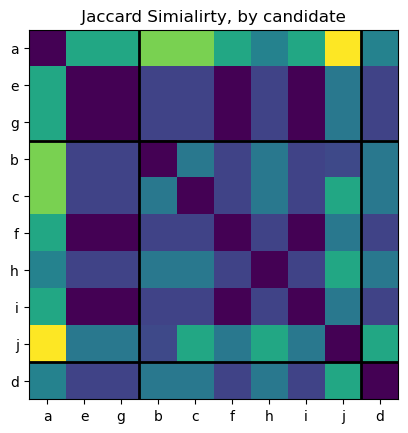

In [12]:
labels = ["a","e","g","b","c","f","h","i","j","d"]
matrix = []

for i in agents:
    inner = []
    for j in agents:
        val = jaccard_binary(i,j)
        inner.append(-val)
    matrix.append(inner)

plt.imshow(matrix)
plt.axhline(y=2.5, color='black', linewidth=2)
plt.axvline(x=2.5, color='black', linewidth=2)
plt.axhline(y=8.5, color='black', linewidth=2)
plt.axvline(x=8.5, color='black', linewidth=2)

plt.xticks(range(len(labels)), labels)
plt.yticks(range(len(labels)), labels)
plt.title(" Jaccard Simialirty, by candidate ")


### agents have: 
    - have higher jaccard similaries with agents that support the same candidate as them 
    - lower jaccard similarities with agents that support a different candidate
    


# Pie Charts per Issue


### most unianimity = climate change/aboriton/gun control
### least unianimity = death penalty

Text(0.5, 1.0, 'Do you agree with the United States improving LGBTQIA+ rights?')

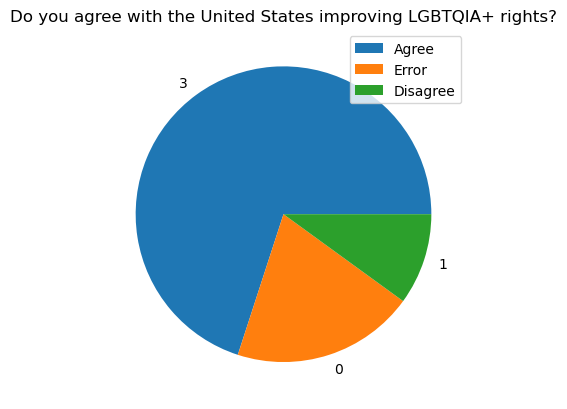

In [13]:
def pie(inpt):
    labels = df[inpt].value_counts().keys()
    sizes = list(df[inpt].value_counts())
    plt.pie(sizes, labels=labels)
   

    return 


pie(df.columns[0])
plt.legend(["Agree", "Error", "Disagree"])
plt.title("Do you agree with the United States improving LGBTQIA+ rights?")

Text(0.5, 1.0, 'Do you agree with the United States increasing gun control?')

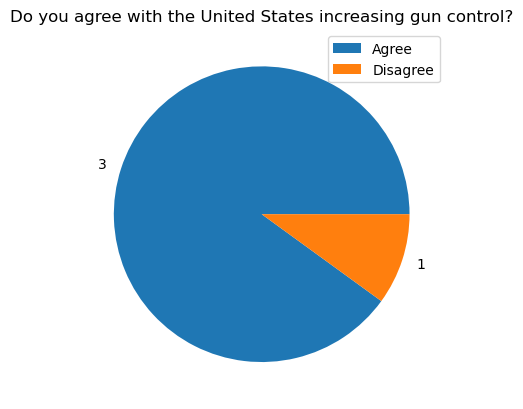

In [14]:
pie(df.columns[1])
plt.legend(["Agree", "Disagree"])
plt.title("Do you agree with the United States increasing gun control?")

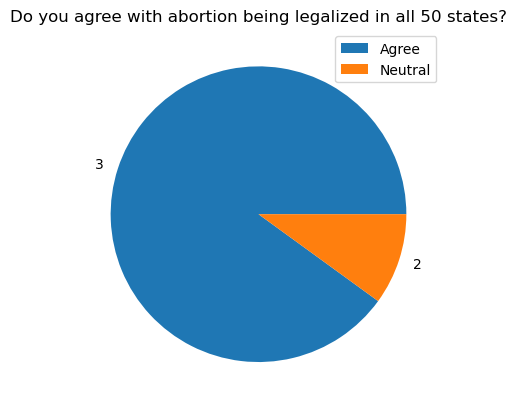

In [15]:
pie(df.columns[2])
plt.title("Do you agree with abortion being legalized in all 50 states?")
plt.legend(["Agree", "Neutral"])

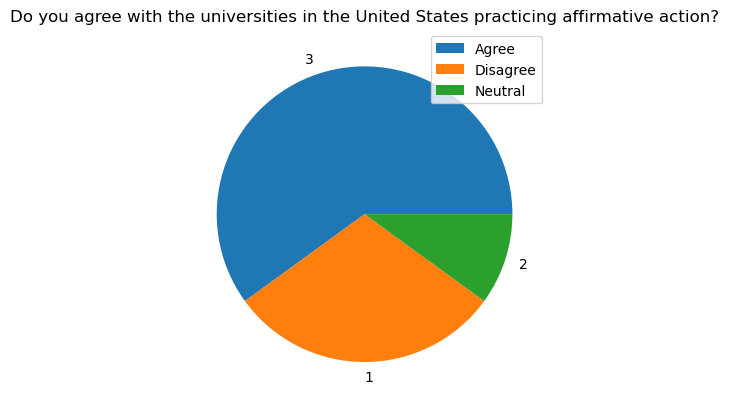

In [16]:
pie(df.columns[3])
plt.title("Do you agree with the universities in the United States practicing affirmative action?")
plt.legend(["Agree", "Disagree", "Neutral"])

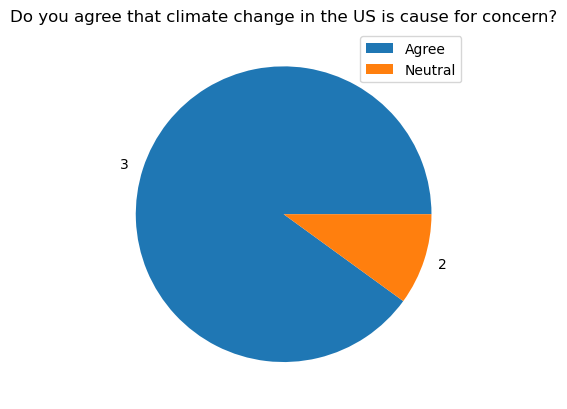

In [17]:
pie(df.columns[4])
plt.title("Do you agree that climate change in the US is cause for concern?")
plt.legend(["Agree", "Neutral"])

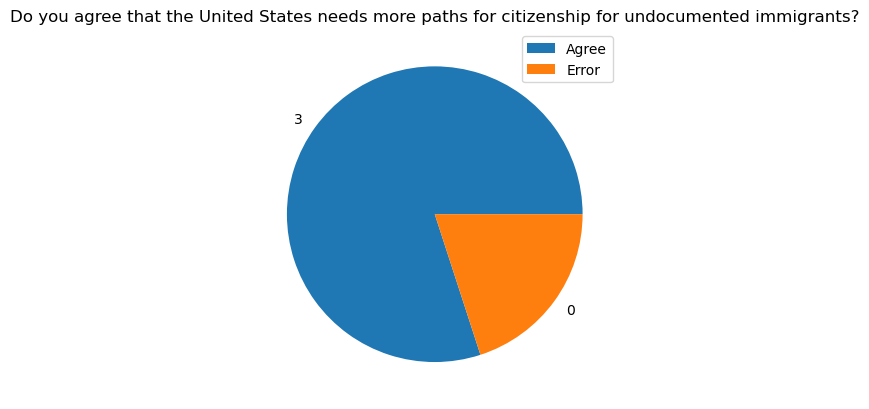

In [18]:
pie(df.columns[5])
plt.title("Do you agree that the United States needs more paths for citizenship for undocumented immigrants?")
plt.legend(["Agree", "Error"])

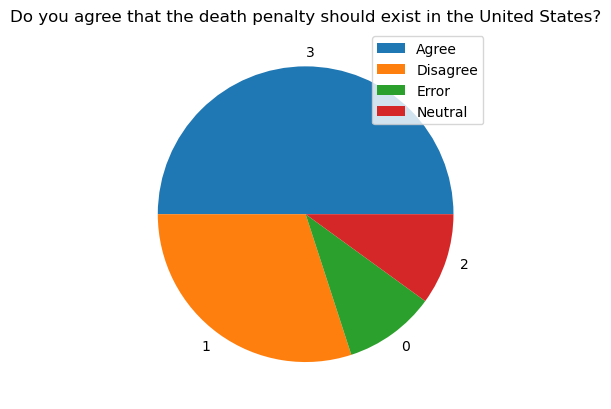

In [19]:
pie(df.columns[6])
plt.title("Do you agree that the death penalty should exist in the United States?")
plt.legend(["Agree", "Disagree", "Error", "Neutral"])

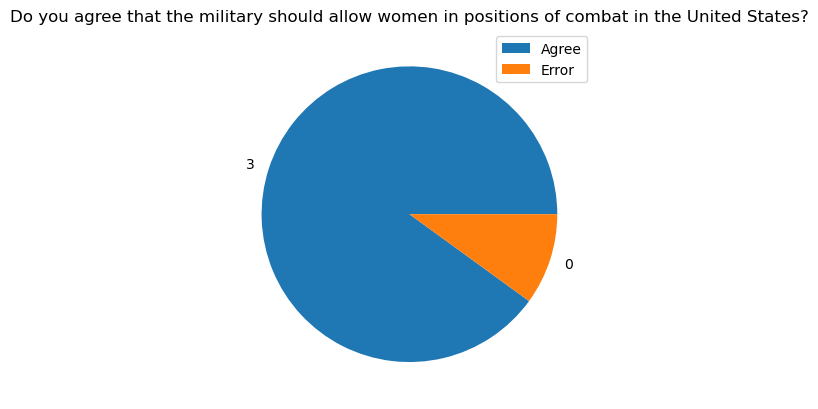

In [20]:
pie(df.columns[7])
plt.title("Do you agree that the military should allow women in positions of combat in the United States?")
plt.legend(["Agree", "Error"])

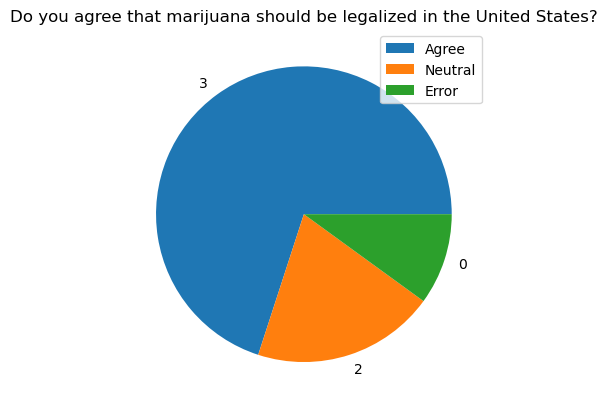

In [21]:
pie(df.columns[8])
plt.title("Do you agree that marijuana should be legalized in the United States?")
plt.legend(["Agree", "Neutral", "Error"])

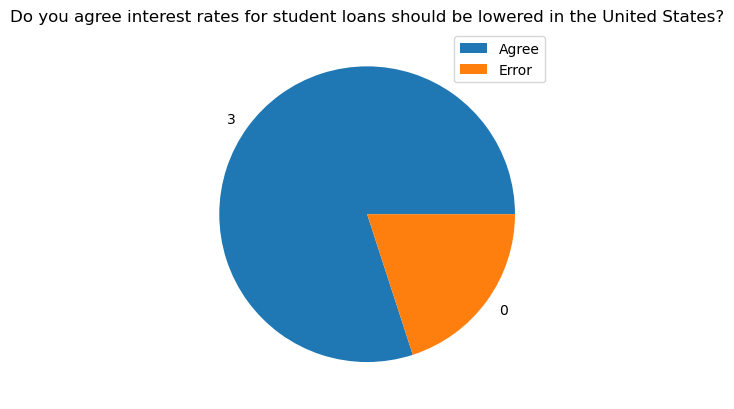

In [22]:
pie(df.columns[9])
plt.title("Do you agree interest rates for student loans should be lowered in the United States?")
plt.legend(["Agree", "Error"])

# Percentage from each party that supports each issue

### most interesting: LGBTQ and death penalty

In [23]:


def pie(inpt):
    only_inpt = biden[[inpt]]
    biden_percentage_agree = len(only_inpt[only_inpt[inpt]==3])/6
    only_inpt = trump[[inpt]]
    trump_percentage_agree = len(only_inpt[only_inpt[inpt]==3])/3
    x = ["biden_supporters", "trump_supporters"]
    y = [biden_percentage_agree, trump_percentage_agree ]
    plt.bar(x,y)
    plt.xlabel("candidate agent supports")
    plt.ylabel("percentage that supports statement")
    plt.ylim(0, 1)
    return 




Text(0.5, 1.0, 'Agree that United States should LGBTQIA+ rights?')

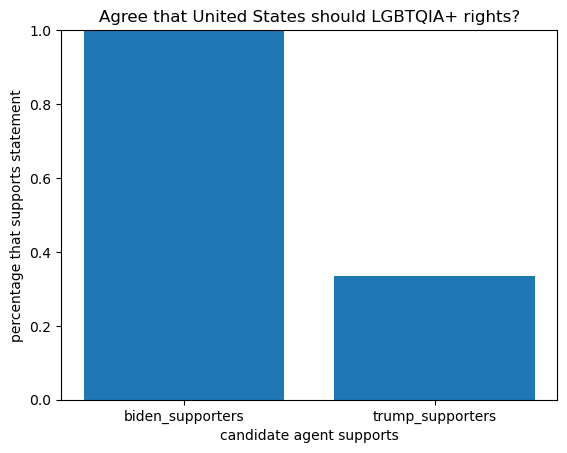

In [24]:
pie(df_with_support.columns[0])
plt.title("Agree that United States should LGBTQIA+ rights?")

Text(0.5, 1.0, 'Agree that United States should increase gun control?')

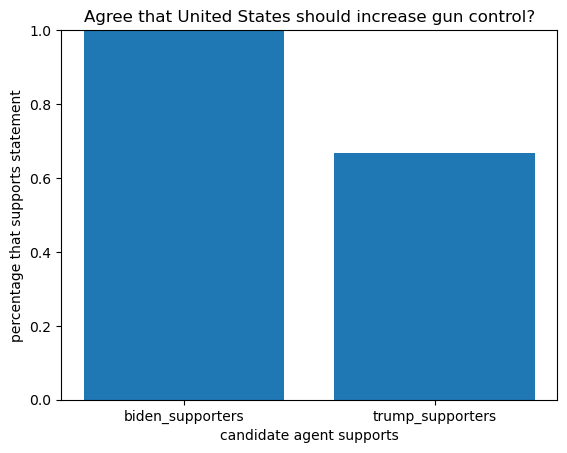

In [25]:
pie(df_with_support.columns[1])
plt.title("Agree that United States should increase gun control?")


Text(0.5, 1.0, 'Agree that abortion should be legalized in the US?')

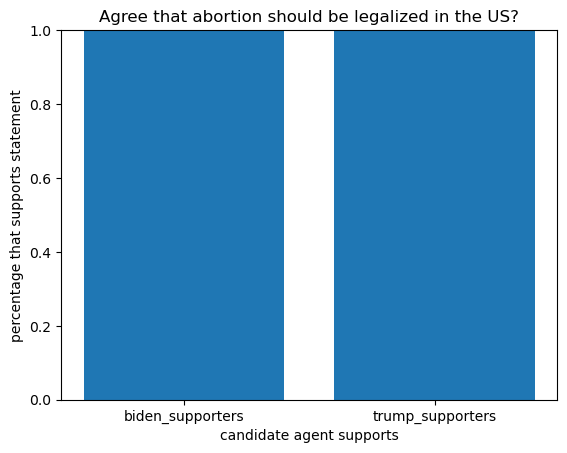

In [26]:
pie(df_with_support.columns[2])
plt.title("Agree that abortion should be legalized in the US?")


Text(0.5, 1.0, 'Agree that American universities should practice affirmative action?')

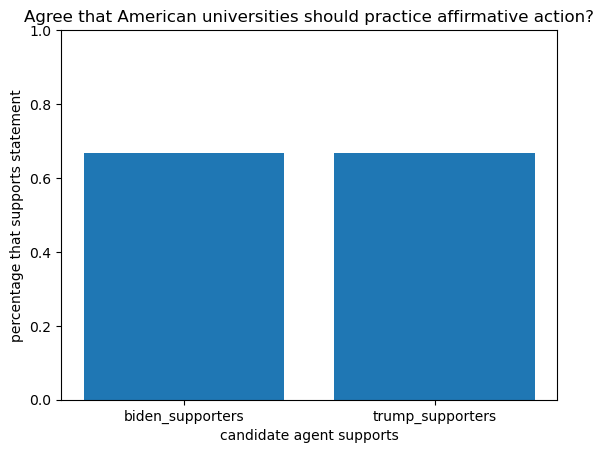

In [27]:
pie(df_with_support.columns[3])
plt.title("Agree that American universities should practice affirmative action?")


Text(0.5, 1.0, 'Agree that climate change is a cause for conern? ')

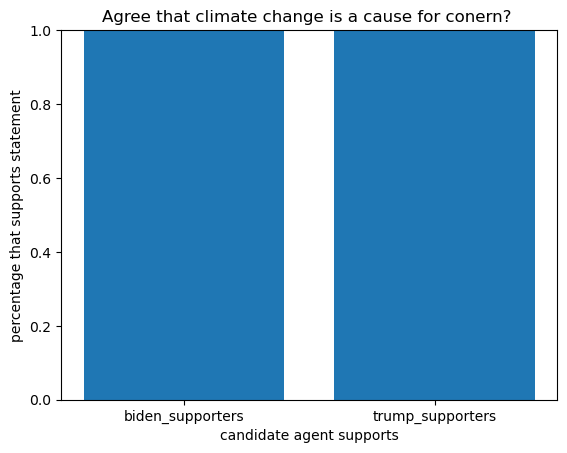

In [28]:
pie(df_with_support.columns[4])
plt.title("Agree that climate change is a cause for conern? ")


Text(0.5, 1.0, 'Agree that US needs to provide more paths of citizenship for undocumented immigrants?')

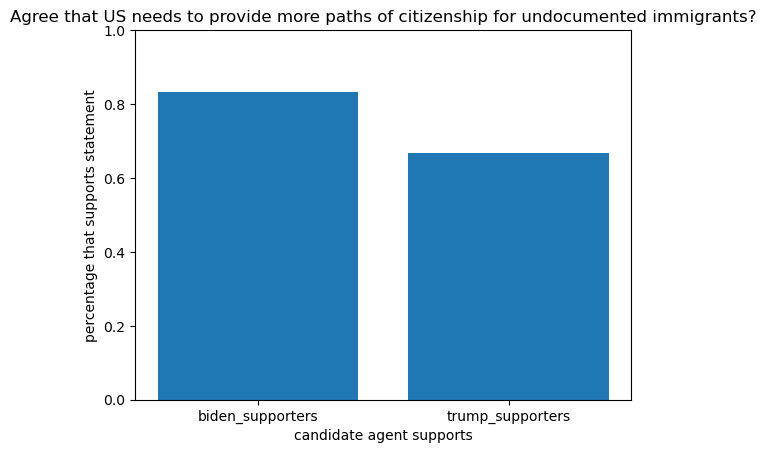

In [29]:
pie(df_with_support.columns[5])
plt.title("Agree that US needs to provide more paths of citizenship for undocumented immigrants?")


Text(0.5, 1.0, 'Agree that the death penalty should exist in the US?')

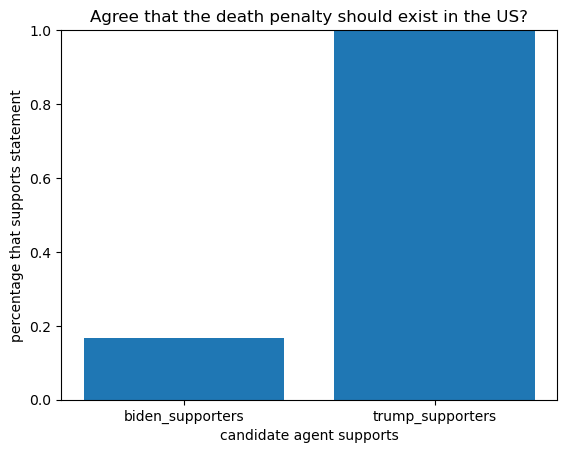

In [30]:
pie(df_with_support.columns[6])
plt.title("Agree that the death penalty should exist in the US?")

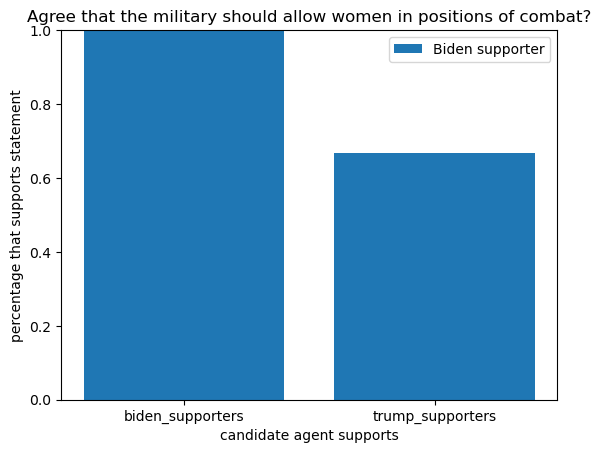

In [31]:
pie(df_with_support.columns[7])
plt.title("Agree that the military should allow women in positions of combat?")
plt.legend(["Biden supporter", "Trump supporter", "Neutral"])

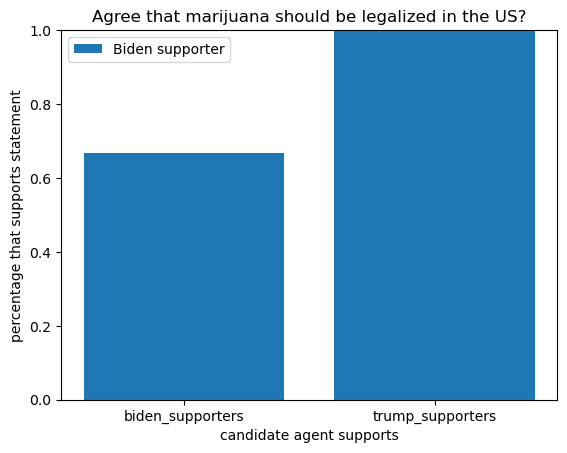

In [32]:
pie(df_with_support.columns[8])
plt.title("Agree that marijuana should be legalized in the US?")
plt.legend(["Biden supporter", "Trump supporter", "Neutral"])